# Data Engineering

Data Engineering, the process of gathering and preparing data for analysis, is a very big part of Data Science.

Datasets might not be formatted in the way you need (e.g. you have categorical features but your algorithm requires numerical features); or you might need to cross-reference some dataset to another that has a different format; or you might be dealing with a dataset that contains missing or invalid data.

These are just a few examples of why data retrieval and cleaning are so important.

## Retrieving data from the web

### requests
The first task you'll have on HW1 will be to retrieve some data from the Internet. Python has many built-in libraries that were developed over the years to do exactly that (e.g. urllib, urllib2, urllib3).

However, these libraries are very low-level and somewhat hard to use. They become especially cumbersome when you need to issue POST requests or authenticate against a web service.

Luckly, as with most tasks in Python, someone has developed a library that simplifies these tasks. In reality, the requests made both on this lab and on HW1 are fairly simple, and could easily be done using one of the built-in libraries. However, it is better to get acquainted to `requests` as soon as possible, since you will probably need it in the future.

In [1]:
import requests
req = requests.get("https://en.wikipedia.org/wiki/UCLA")

##### Aside

Python is an Object Oriented language, and everything on it is an object. Even built-in functions such as `len` are just syntactic sugar for acting on object properties.

We will not dwell too long on OO concepts, but some of Python's idiosyncrasies will be easier to understand if we spend a few minutes on this subject.

When you evaluate an object itself, such as the `req` object we created above, Python will automatially call the `__str__()` or `__repr__()` method of that object. The default values for these methods are usually very simple and boring. The `req` object however has a custom implementation that shows the object type (i.e. `Response`) and the HTTP status number (200 means the request was successful).

In [2]:
print req
type(req)

<Response [200]>


requests.models.Response

Another very nifty Python function is `dir`. You can use it to list all the properties of an object.

By the way, properties starting with a single and double underscores are usually not meant to be called directly.

In [3]:
dir(req)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__iter__',
 '__module__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [4]:
# Page data is held in text member
page = req.text
page

u'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>University of California, Los Angeles - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"University_of_California,_Los_Angeles","wgTitle":"University of California, Los Angeles","wgCurRevisionId":790606183,"wgRevisionId":790606183,"wgArticleId":37765,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from April 2017","CS1 Chinese-language sources (zh)","Webarchive template wayback links","Articles with dead external links from March 2017","Articles with permanently dead 

### BeautifulSoup

Parsing data would be a breeze if we could always use well formatted data sources, such as CSV, JSON, or XML; but some formats such as HTML are at the same time a very popular and a pain to parse.

One of the problems with HTML is that over the years browsers have evolved to be very forgiving of "malformed" syntax. Your browser is smart enough to detect some common problems, such as open tags, and correct them on the fly.

Unfortunately, we do not have the time or patience to implement all the different corner cases, so we'll let BeautifulSoup do that for us.

You'll notice that the `import` statement bellow is different from what we used for `requests`. The _from library import thing_ pattern is useful when you don't want to reference a function byt its full name (like we did with `requests.get`), but you also don't want to import every single thing on that library into your namespace.

In [5]:
from bs4 import BeautifulSoup

BeautifulSoup can deal with HTML or XML data, so the next line parser the contents of the `page` variable using its HTML parser, and assigns the result of that to the `soup` variable.

In [6]:
soup = BeautifulSoup(page, 'html.parser')
soup

<!DOCTYPE html>\n\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="unicode-escape"/>\n<title>University of California, Los Angeles - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"University_of_California,_Los_Angeles","wgTitle":"University of California, Los Angeles","wgCurRevisionId":790606183,"wgRevisionId":790606183,"wgArticleId":37765,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from April 2017","CS1 Chinese-language sources (zh)","Webarchive template wayback links","Articles with dead external links from March 2017","Articles with permanen

In [7]:
print type(page)
print type(soup)

<type 'unicode'>
<class 'bs4.BeautifulSoup'>


In [8]:
print soup.prettify()

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   University of California, Los Angeles - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"University_of_California,_Los_Angeles","wgTitle":"University of California, Los Angeles","wgCurRevisionId":790606183,"wgRevisionId":790606183,"wgArticleId":37765,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from April 2017","CS1 Chinese-language sources (zh)","Webarchive template wayback links","Articles with dead external links from March 2017","Articles with 

In [9]:
# What can we access on soup?
dir(soup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'HTML_FORMATTERS',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 'XML_FORMATTERS',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_attr_value_as_string',
 '_attribute_checker',
 '_feed',
 '_find_all',
 '_find_one',
 '_formatter_for_name',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_most_recent_element',
 '_popToTag',
 '_select_debug',
 '_selector_combinators',
 '_should_pretty_print',
 '_tag_name_matches_and',
 'append',
 'attribselect_re',
 'attrs',
 'builder',
 'can_be_empty_eleme

We can now reference elements of the HTML document in different ways. One very convenient way is by using the dot notation, which allows us to access the elements as if they were properties of the object.

In [10]:
soup.title

<title>University of California, Los Angeles - Wikipedia</title>

But we should make it clear that this is again just syntactic sugar. `title` is not a property of the `soup` object and I can prove it:

In [11]:
"title" in dir(soup)

False

In [12]:
# Be careful with elements that show up multiple times.
soup.p

<p>The <b>University of California, Los Angeles</b> (<b>UCLA</b>) is a <a href="/wiki/Public_university" title="Public university">public</a> <a href="/wiki/Research_university" title="Research university">research university</a> in the <a href="/wiki/Westwood,_Los_Angeles" title="Westwood, Los Angeles">Westwood</a> district of <a href="/wiki/Los_Angeles" title="Los Angeles">Los Angeles</a>, <a href="/wiki/California" title="California">California</a>, United States. It became the Southern Branch of the University of California in 1919, making it the second-oldest undergraduate campus of the ten-campus <a href="/wiki/University_of_California" title="University of California">University of California</a> system.<sup class="reference" id="cite_ref-10"><a href="#cite_note-10">[10]</a></sup> It offers 337 undergraduate and graduate degree programs in a wide range of disciplines.<sup class="reference" id="cite_ref-11"><a href="#cite_note-11">[11]</a></sup> UCLA enrolls about 31,000 undergra

That's why it is safer to use the explicit commands behind that syntactic sugar I mentioned. These are `BeautifulSoup.find` for getting single elements, and `BeautifulSoup.find_all` for retrieving multiple elements.

In [13]:
len(soup.find_all("p"))

125

If you look at the Wikipedia page on your browser, you'll notice that it has a couple of tables in it. We will be working with the "Demographics" table, but first we need to find it.

One of the HTML attributes that will be very useful to us is the "class" attribute.

Getting the class of a single element is easy...

In [14]:
# the class attr of first table on page
soup.table["class"]

[u'infobox', u'vcard']

Next we will use a **list comprehension** to see all the tables that have a "class" attributes. List comprehensions are a very cool Python feature that allows for a loop iteration and a list creation in a single line.

In [15]:
# find classes for all tables on page, and add em to a list
[t["class"] for t in soup.find_all("table") if t.get("class")]

[[u'infobox', u'vcard'],
 [u'plainlinks', u'metadata', u'ambox', u'mbox-small-left', u'ambox-content'],
 [u'multicol'],
 [u'multicol'],
 [u'infobox'],
 [u'wikitable', u'sortable', u'collapsible', u'collapsed'],
 [u'wikitable', u'sortable', u'collapsible', u'collapsed'],
 [u'wikitable'],
 [u'wikitable', u'sortable'],
 [u'plainlinks',
  u'metadata',
  u'ambox',
  u'ambox-content',
  u'ambox-Unreferenced'],
 [u'wikitable'],
 [u'plainlinks',
  u'metadata',
  u'ambox',
  u'mbox-small-left',
  u'ambox-style',
  u'ambox-very_long'],
 [u'plainlinks', u'metadata', u'ambox', u'ambox-move'],
 [u'infobox'],
 [u'infobox'],
 [u'mbox-small', u'plainlinks', u'sistersitebox'],
 [u'nowraplinks', u'hlist', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'hlist', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u

In [16]:
# Get the table containing demographic data
tables_html = soup.findAll("table", "wikitable")

In [17]:
# Render HTML
from IPython.core.display import HTML
HTML(str(tables_html))

Program,Ranking
Biological Sciences,19
Business,15
Chemistry,15
Clinical Psychology,1
Computer Science,13
Earth Sciences,13
Economics,12
Education,3
Engineering,16
English,6


In [18]:
# There are many tables matching class description, so get the one that we want
table_html = tables_html[3]

In [19]:
HTML(str(table_html))

,Undergrad,Graduate,Percentage
Black Non-Hispanic,"1,485",619,4.8%
Asian or Pacific Islander,"9,917","2,566",29.1%
Hispanic,"6,462","1,188",17.3%
American Indian or Alaskan Native,169,79,0.6%
White Non-Hispanic,"8,113","4,394",29.1%
"Unstated, Unknown, Other","1,068",670,4.0%
Foreign,"3,659","3,159",15.2%


First we'll use a list comprehension to extract the rows (*tr*) elements.

In [20]:
rows = [row for row in table_html.find_all("tr")]
rows

[<tr>\n<td></td>\n<td><b>Undergrad</b></td>\n<td><b>Graduate</b></td>\n<td><b>Percentage</b></td>\n</tr>,
 <tr>\n<td>Black Non-Hispanic</td>\n<td>1,485</td>\n<td>619</td>\n<td>4.8%</td>\n</tr>,
 <tr>\n<td>Asian or Pacific Islander</td>\n<td>9,917</td>\n<td>2,566</td>\n<td>29.1%</td>\n</tr>,
 <tr>\n<td>Hispanic</td>\n<td>6,462</td>\n<td>1,188</td>\n<td>17.3%</td>\n</tr>,
 <tr>\n<td>American Indian or Alaskan Native</td>\n<td>169</td>\n<td>79</td>\n<td>0.6%</td>\n</tr>,
 <tr>\n<td>White Non-Hispanic</td>\n<td>8,113</td>\n<td>4,394</td>\n<td>29.1%</td>\n</tr>,
 <tr>\n<td>Unstated, Unknown, Other</td>\n<td>1,068</td>\n<td>670</td>\n<td>4.0%</td>\n</tr>,
 <tr>\n<td>Foreign</td>\n<td>3,659</td>\n<td>3,159</td>\n<td>15.2%</td>\n</tr>]

### lambda expressions

We will then use a lambda expression to replace new line characters with spaces. Lambda expressions are to functions what list comprehensions are to lists: namely a more concise way to achieve the same thing.

In reality, both lambda expressions and list comprehensions are a little different from their function and loop counterparts. But for the purposes of this class we can ignore those differences.

In [21]:
# Lambda expressions return the value of the expression inside it.
# In this case, it will return a string with new line characters replaced by spaces.
rem_nl = lambda f: f.replace("\n", " ")

### Aside: Functions

In [22]:
# Normal
def power(x, y):
    return x**y

power(2, 3)

8

But Python functions can also have no arguments

In [23]:
def print_greeting():
    print "Hello!"
    
print_greeting()

Hello!


But Python also allows you to have default values for some parameters:

In [24]:
# The function bellow can be called with x and y, in which case it will return x*y;
# or it can be called with x only, in which case it will return x*1.
def get_multiple(x, y=1):
    return x*y

print "With x and y: ", get_multiple(10, 2)
print "With x only: ", get_multiple(10)

With x and y:  20
With x only:  10


Default values allow function definitions to be very flexible, and are used extensively on the libraries we'll be using. Also, note that the `x` value must be present, or the call will fail.

Things start to get more interesting when we have multiple default values:

In [25]:
def print_special_greeting(name, leaving=False, condition="nice"):
    print "Hi", name
    print "How are you doing in this", condition, "day?"
    if leaving:
        print "Please come back!"

In [26]:
# Use all the default values.
print_special_greeting("John")

Hi John
How are you doing in this nice day?


In [27]:
# Specify all values.
print_special_greeting("John", True, "rainy")

Hi John
How are you doing in this rainy day?
Please come back!


In [28]:
# Change only the first default value.
print_special_greeting("John", True)

Hi John
How are you doing in this nice day?
Please come back!


But what if you wanted to use the first default value but change the second? Named parameters to the rescue!

In [29]:
print_special_greeting("John", condition="horrible")

Hi John
How are you doing in this horrible day?


This allows us to only change the default parameters that we want, and keep the rest. The functionality itself is called _named parameters_.

There are two more, somewhat advanced, topics we will cover for functions. Arbitrary and keyword arguments allow for even more flexibility.

Arbitrary arguments are used when you're not sure how many arguments your function will get (notice the single asterisk before the second argument name):

In [30]:
def print_siblings(name, *siblings):
    print name, "has the following siblings:"
    for sibling in siblings:
        print sibling
    print
        
print_siblings("John", "Ashley", "Lauren", "Arthur")
print_siblings("Mike", "John")
print_siblings("Terry")

John has the following siblings:
Ashley
Lauren
Arthur

Mike has the following siblings:
John

Terry has the following siblings:



In the function above, any optional argument will go into a list called `siblings`. We can then process that list to extract the names.

Keyword arguments mix the named argument and arbitrary properties (notice the double asterisks before the second argument name):

In [31]:
def print_brothers_sisters(name, **siblings):
    print name, "has the following siblings:"
    for sibling in siblings:
        print sibling, ":", siblings[sibling]
    
print_brothers_sisters("John", Ashley="sister", Lauren="sister", Arthur="brother")

John has the following siblings:
Arthur : brother
Lauren : sister
Ashley : sister


Lastly, when putting all those things together one must follow a certain order:

```
def my_func(arg1, arg2, opt1=True, opt2="CS109", *args, **kwargs):
    ...
```

That was a lengthy interlude! Now let's get back to data science.

### Splitting the data

In [32]:
HTML(str(table_html))

,Undergrad,Graduate,Percentage
Black Non-Hispanic,"1,485",619,4.8%
Asian or Pacific Islander,"9,917","2,566",29.1%
Hispanic,"6,462","1,188",17.3%
American Indian or Alaskan Native,169,79,0.6%
White Non-Hispanic,"8,113","4,394",29.1%
"Unstated, Unknown, Other","1,068",670,4.0%
Foreign,"3,659","3,159",15.2%


Next we extract the text value of the columns. If you look at the table above, you'll see that we have three columns and seven rows.

Here we're taking the first element (Python indexes start at zero), iterating over the *td* elements inside it, and taking the text value of those elements. We should end up with a list of column names.

In [33]:
rows

[<tr>\n<td></td>\n<td><b>Undergrad</b></td>\n<td><b>Graduate</b></td>\n<td><b>Percentage</b></td>\n</tr>,
 <tr>\n<td>Black Non-Hispanic</td>\n<td>1,485</td>\n<td>619</td>\n<td>4.8%</td>\n</tr>,
 <tr>\n<td>Asian or Pacific Islander</td>\n<td>9,917</td>\n<td>2,566</td>\n<td>29.1%</td>\n</tr>,
 <tr>\n<td>Hispanic</td>\n<td>6,462</td>\n<td>1,188</td>\n<td>17.3%</td>\n</tr>,
 <tr>\n<td>American Indian or Alaskan Native</td>\n<td>169</td>\n<td>79</td>\n<td>0.6%</td>\n</tr>,
 <tr>\n<td>White Non-Hispanic</td>\n<td>8,113</td>\n<td>4,394</td>\n<td>29.1%</td>\n</tr>,
 <tr>\n<td>Unstated, Unknown, Other</td>\n<td>1,068</td>\n<td>670</td>\n<td>4.0%</td>\n</tr>,
 <tr>\n<td>Foreign</td>\n<td>3,659</td>\n<td>3,159</td>\n<td>15.2%</td>\n</tr>]

But there is one little caveat: the first column of the table is actually an empty string (look at the cell right above the row names). We could add it to our list and then remove it afterwards; but instead we will use the `if` statement inside the list comprehension to filter that out.

Python considers most values to be equivalent to True. The exceptions are False, None, 0, "" (empty string), []/{}/(,)... (empty containers). Here the `get_text` will return an empty string for the first cell of the table, which means that the test will fail and the value will not be added to the list.

In [34]:
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("td") if col.get_text()]
columns

[u'Undergrad', u'Graduate', u'Percentage']

Now let's do the same for the rows. Notice that since we have already parsed the header row, we will continue from the second row. The `[1:]` is a slice notation and in this case it means we want all values starting from the second position.

In [35]:
# the first td is the index, so just use find
indexes = [row.find("td").get_text() for row in rows[1:]]
indexes

[u'Black Non-Hispanic',
 u'Asian or Pacific Islander',
 u'Hispanic',
 u'American Indian or Alaskan Native',
 u'White Non-Hispanic',
 u'Unstated, Unknown, Other',
 u'Foreign']

In [36]:
# Here's the original HTML table.
HTML(str(table_html))

,Undergrad,Graduate,Percentage
Black Non-Hispanic,"1,485",619,4.8%
Asian or Pacific Islander,"9,917","2,566",29.1%
Hispanic,"6,462","1,188",17.3%
American Indian or Alaskan Native,169,79,0.6%
White Non-Hispanic,"8,113","4,394",29.1%
"Unstated, Unknown, Other","1,068",670,4.0%
Foreign,"3,659","3,159",15.2%


Here we have another lambda expression that transforms the string on the cells to integers. We start by checking if the last character of the string (Python allows for negative indexes) is a percent sign. If that is true, then we convert the characters before the sign to integers. Lastly, if one of the prior checks fails, we return a value of None.

This is a very common pattern in Python, and it works for two reasons: Python's `and` and `or` are "short-circuit" operators. This means that if the first element of an `and` statement evaluates to False, the second one is never computed (which in this case would be a problem since we can't convert a non-digit string to an integer). The `or` statement works the other way: if the first element evaluates to True, the second is never computed.

The second reason this works is because these operators will return the value of the last expression that was evaluated, which is this case will be either the integer value or the value `None`.

One last thing to notice: Python slices are open on the upper bound. So the `[:-1]` construct will return all elements of the string, except for the last.

In [37]:
# in UCLA dataset tho, we need to get rid of "," and then convert to int
to_num = lambda f: int(f.replace(",",""))

In [38]:
# in UCLA dataset, even the th headers are tr, and the last columns % are not useful
# So, only work with middle 2 cols
values = [to_num(value.get_text()) for row in rows[1:] for value in row.find_all("td")[1:-1]]
values

[1485, 619, 9917, 2566, 6462, 1188, 169, 79, 8113, 4394, 1068, 670, 3659, 3159]

The problem with the list above is that the values lost their grouping.

The `zip` function is used to combine two sequences element wise. So `zip([1,2,3], [4,5,6])` would return `[(1, 4), (2, 5), (3, 6)]`.

This is the first time we see a container bounded by parenthesis. This is a tuple, which you can think of as an immutable list (meaning you can't add, remove, or change elements from it). Otherwise they work just like lists and can be indexed, sliced, etc.

In [39]:
# We need first 2 cols
# We need to stack together every 2nd element, so i::2
stacked_values = zip([values[i::2] for i in range(len(columns)-1)])
stacked_values

[([1485, 9917, 6462, 169, 8113, 1068, 3659],),
 ([619, 2566, 1188, 79, 4394, 670, 3159],)]

### Exploding parameters

The asterisk before the list comprehension is used to _explode_ the list. Take a look at the function calls bellow:

In [40]:
def print_args(arg1, arg2, arg3):
    print arg1, arg2, arg3

# Print three numbers.
print_args(1, 2, 3)

# Print three lists.
print_args([1, 10], [2, 20], [3, 30])

1 2 3
[1, 10] [2, 20] [3, 30]


But sometimes we have a container holding our parameters. Here's the hard way to handle this:

In [41]:
parameters = [100, 200, 300]

p1 = parameters[0]
p2 = parameters[1]
p3 = parameters[2]

print_args(p1, p2, p3)

100 200 300


A slightly better way to handle this is to use the unpacking functionality. We can assign values from a container directly to variables using the syntax bellow (note that the container can have more values than there are variables, but not the other way around):

In [42]:
p4, p5, p6 = parameters
print_args(p4, p5, p6)

100 200 300


But the best way to handle these situations is to _explode_ the list by placing an asterisk before it:

In [43]:
print_args(*parameters)

100 200 300


**So**, we need to explode the list comprehension above

In [44]:
stacked_values = zip(*[values[i::2] for i in range(len(columns)-1)])
stacked_values

[(1485, 619),
 (9917, 2566),
 (6462, 1188),
 (169, 79),
 (8113, 4394),
 (1068, 670),
 (3659, 3159)]

Notice that this has the opposite effect of when we used it during the function definition. There the asterisk packed the optional arguments into a list; here it unpacked the list into individual arguments.

### Dictionary comprehension

By the way, Python has another _comprehension_ that will be useful in the future: the `dictionary comprehension`. The syntax if very similar to the `list comprehension`, but we use curly instead of square brackets, and we must define both the key and value of each iteration.

An example is in order:

In [45]:
{ind: value for ind, value in zip(indexes, stacked_values)}

{u'American Indian or Alaskan Native': (169, 79),
 u'Asian or Pacific Islander': (9917, 2566),
 u'Black Non-Hispanic': (1485, 619),
 u'Foreign': (3659, 3159),
 u'Hispanic': (6462, 1188),
 u'Unstated, Unknown, Other': (1068, 670),
 u'White Non-Hispanic': (8113, 4394)}

## Pandas data structures

### DataFrames

To recap, we now have three data structures holding: our column names, our row (index) names, and our values grouped by index.

We will now load this data into a Pandas DataFrame. The loading process is pretty straightforward, and all we need to do is tell Pandas which container goes where.

In [46]:
import pandas as pd
print stacked_values
print columns
print indexes

[(1485, 619), (9917, 2566), (6462, 1188), (169, 79), (8113, 4394), (1068, 670), (3659, 3159)]
[u'Undergrad', u'Graduate', u'Percentage']
[u'Black Non-Hispanic', u'Asian or Pacific Islander', u'Hispanic', u'American Indian or Alaskan Native', u'White Non-Hispanic', u'Unstated, Unknown, Other', u'Foreign']


In [47]:
# get rid of last column
columns = columns[:-1]
columns

[u'Undergrad', u'Graduate']

In [48]:
df = pd.DataFrame(stacked_values, columns=columns, index=indexes)
df

,Undergrad,Graduate
Black Non-Hispanic,1485,619
Asian or Pacific Islander,9917,2566
Hispanic,6462,1188
American Indian or Alaskan Native,169,79
White Non-Hispanic,8113,4394
"Unstated, Unknown, Other",1068,670
Foreign,3659,3159


#### Other ways to create the DataFrame

That was one of many ways to construct a dataframe. Here is another that uses a list of dictionaries:

First we combine the list and dictionary comprehensions to get a list of dictionaries representing each row in the data.

In [49]:
data_dicts = [{col: val for col, val in zip(columns, col_values)} for col_values in stacked_values]
data_dicts

[{u'Graduate': 619, u'Undergrad': 1485},
 {u'Graduate': 2566, u'Undergrad': 9917},
 {u'Graduate': 1188, u'Undergrad': 6462},
 {u'Graduate': 79, u'Undergrad': 169},
 {u'Graduate': 4394, u'Undergrad': 8113},
 {u'Graduate': 670, u'Undergrad': 1068},
 {u'Graduate': 3159, u'Undergrad': 3659}]

In [50]:
pd.DataFrame(data_dicts, index=indexes)

,Graduate,Undergrad
Black Non-Hispanic,619,1485
Asian or Pacific Islander,2566,9917
Hispanic,1188,6462
American Indian or Alaskan Native,79,169
White Non-Hispanic,4394,8113
"Unstated, Unknown, Other",670,1068
Foreign,3159,3659


And yet another that uses a dictionary of lists:

To achieve this we group the values columnwise...

In [51]:
stacked_by_col = [values[i::2] for i in range(len(columns))] # i to the last, skipping 2s
stacked_by_col

[[1485, 9917, 6462, 169, 8113, 1068, 3659],
 [619, 2566, 1188, 79, 4394, 670, 3159]]

and then revert the pattern we used to create a list of dictionaries.

In [52]:
data_lists = {col: val for col, val in zip(columns, stacked_by_col)}
data_lists

{u'Graduate': [619, 2566, 1188, 79, 4394, 670, 3159],
 u'Undergrad': [1485, 9917, 6462, 169, 8113, 1068, 3659]}

In [53]:
pd.DataFrame(data_lists, index=indexes)

,Graduate,Undergrad
Black Non-Hispanic,619,1485
Asian or Pacific Islander,2566,9917
Hispanic,1188,6462
American Indian or Alaskan Native,79,169
White Non-Hispanic,4394,8113
"Unstated, Unknown, Other",670,1068
Foreign,3159,3659


### DataFrame cleanup

Our DataFrame looks nice; but does it have the right data types?

In [54]:
df.dtypes

Undergrad    int64
Graduate     int64
dtype: object

yup, looks fine, but there can be common issues (eg. w/ Harvard dataset)

So, introduce a mistake

In [55]:
index_alt = ['Aliens']
row_alt = {'Graduate': [50], 'Undergrad': [float('nan')]}
df_alt = pd.concat([df, pd.DataFrame(row_alt, index=index_alt)])
df_alt

,Graduate,Undergrad
Black Non-Hispanic,619,1485.0
Asian or Pacific Islander,2566,9917.0
Hispanic,1188,6462.0
American Indian or Alaskan Native,79,169.0
White Non-Hispanic,4394,8113.0
"Unstated, Unknown, Other",670,1068.0
Foreign,3159,3659.0
Aliens,50,NaN


In [56]:
print df_alt.dtypes

Graduate       int64
Undergrad    float64
dtype: object


Missing values can mess up a lot of our calculations, and some function don't work at all when `NaN` are present. So we should probably clean this up.

One way to do that is by dropping the rows that have missing values:

In [57]:
df_alt.dropna()

,Graduate,Undergrad
Black Non-Hispanic,619,1485.0
Asian or Pacific Islander,2566,9917.0
Hispanic,1188,6462.0
American Indian or Alaskan Native,79,169.0
White Non-Hispanic,4394,8113.0
"Unstated, Unknown, Other",670,1068.0
Foreign,3159,3659.0


Or the columns that have missing values:

In [58]:
df_alt.dropna(axis=1)

,Graduate
Black Non-Hispanic,619
Asian or Pacific Islander,2566
Hispanic,1188
American Indian or Alaskan Native,79
White Non-Hispanic,4394
"Unstated, Unknown, Other",670
Foreign,3159
Aliens,50


But we will take a less radical approach and replace the missing value with a zero.  
In this case this solution makes sense, since 0% value meaningful in this context **(NOT)**.  
We will also transform all the values to integers at the same time.

In [59]:
df_clean_alt = df_alt.fillna(0).astype(int)
df_clean_alt

,Graduate,Undergrad
Black Non-Hispanic,619,1485
Asian or Pacific Islander,2566,9917
Hispanic,1188,6462
American Indian or Alaskan Native,79,169
White Non-Hispanic,4394,8113
"Unstated, Unknown, Other",670,1068
Foreign,3159,3659
Aliens,50,0


In [60]:
df_clean_alt.dtypes

Graduate     int64
Undergrad    int64
dtype: object

Now our fake table looks good!

Revert to original. Let's see some basic statistics about it.

In [61]:
df_clean = df.copy()
df_clean.describe()

,Undergrad,Graduate
count,7.000000,7.000000
mean,4410.428571,1810.714286
std,3797.469151,1590.058460
min,169.000000,79.000000
25%,1276.500000,644.500000
50%,3659.000000,1188.000000
75%,7287.500000,2862.500000
max,9917.000000,4394.000000


### NumPy

Pandas is awesome, but it is built on top of another library the we will use extensively during the course. NumPy implements new data types and vectorized functions.

In [62]:
import numpy as np

The `values` method of the DataFrame will return a two-dimensional `array` with the DataFrame values. The `array` is a NumPy structure that we will be using a lot during this class.

In [63]:
df_clean.values

array([[1485,  619],
       [9917, 2566],
       [6462, 1188],
       [ 169,   79],
       [8113, 4394],
       [1068,  670],
       [3659, 3159]])

It's a numpy type array, not a _normal_ array

In [64]:
type(df_clean.values)

numpy.ndarray

NumPy also offers many functions that can operate directly on the DataFrame.

In [65]:
np.mean(df_clean.Undergrad)

4410.428571428572

In [66]:
np.std(df_clean)

Undergrad    3515.773268
Graduate     1472.108082
dtype: float64

### DataFrame indexing

Having the data on a DataFrame would be useless if we could not access individual cells. There are many ways to index DataFrames, and we will cover the most common bellow.

Indexing columns is easy. You can use either the dictionary syntax or the dot syntax. Please note that if the column name contains spaces or other special characters, your only choice will be to use the dictionary syntax.

In [67]:
# Dictionary syntax.
df_clean["Undergrad"]

Black Non-Hispanic                   1485
Asian or Pacific Islander            9917
Hispanic                             6462
American Indian or Alaskan Native     169
White Non-Hispanic                   8113
Unstated, Unknown, Other             1068
Foreign                              3659
Name: Undergrad, dtype: int64

In [68]:
# Dot syntax.
df_clean.Undergrad

Black Non-Hispanic                   1485
Asian or Pacific Islander            9917
Hispanic                             6462
American Indian or Alaskan Native     169
White Non-Hispanic                   8113
Unstated, Unknown, Other             1068
Foreign                              3659
Name: Undergrad, dtype: int64

But what about when you want to get a specific row? DataFrames have three different ways of achieving that.

`DataFrame.loc` allows you to reference a row by index name.

In [69]:
df_clean.loc["Asian or Pacific Islander"]

Undergrad    9917
Graduate     2566
Name: Asian or Pacific Islander, dtype: int64

`DataFrame.iloc` on the other hand uses the row number (starting from zero, of course).

In [70]:
df_clean.iloc[0]

Undergrad    1485
Graduate      619
Name: Black Non-Hispanic, dtype: int64

A third way to do it is with `DataFrame.ix`. This is a hybrid of the previous two and allows you to access a row by name or number. Please note that `ix` can misbehave sometimes, so the previous two methods should be used whenever possible.

In [71]:
df_clean.ix["Asian or Pacific Islander"]

/Users/Sachin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Undergrad    9917
Graduate     2566
Name: Asian or Pacific Islander, dtype: int64

In [72]:
df_clean.ix[0]

Undergrad    1485
Graduate      619
Name: Black Non-Hispanic, dtype: int64

We can also reference individual cells by specifying the desired row and column.

In [73]:
df_clean.loc["White Non-Hispanic", "Graduate"]

4394

In [74]:
df_clean.iloc[4, 1]

4394

In [75]:
df_clean.ix[4, "Graduate"]

4394

In [76]:
df_flat = df_clean.stack().reset_index()
df_flat.columns = ["Race", "Source", "Amount"]
df_flat

,Race,Source,Amount
0,Black Non-Hispanic,Undergrad,1485
1,Black Non-Hispanic,Graduate,619
2,Asian or Pacific Islander,Undergrad,9917
3,Asian or Pacific Islander,Graduate,2566
4,Hispanic,Undergrad,6462
5,Hispanic,Graduate,1188
6,American Indian or Alaskan Native,Undergrad,169
7,American Indian or Alaskan Native,Graduate,79
8,White Non-Hispanic,Undergrad,8113
9,White Non-Hispanic,Graduate,4394


### Split-Apply-Combine pattern

Another common task will be to group tasks. After flattening the DataFrame into one with numerical indexes and column for each feature, we can access individual groups by using the `groupby` method.

In [77]:
grouped = df_flat.groupby("Race")
grouped.groups

{u'American Indian or Alaskan Native': Int64Index([6, 7], dtype='int64'),
 u'Asian or Pacific Islander': Int64Index([2, 3], dtype='int64'),
 u'Black Non-Hispanic': Int64Index([0, 1], dtype='int64'),
 u'Foreign': Int64Index([12, 13], dtype='int64'),
 u'Hispanic': Int64Index([4, 5], dtype='int64'),
 u'Unstated, Unknown, Other': Int64Index([10, 11], dtype='int64'),
 u'White Non-Hispanic': Int64Index([8, 9], dtype='int64')}

Please note that the resulting object will not be a DataFrame, and you must execute an aggregate function on the groups to bring them back into a DataFrame format.

In [78]:
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [79]:
mean_amounts = grouped.mean()
mean_amounts

,Amount
Race,
American Indian or Alaskan Native,124.0
Asian or Pacific Islander,6241.5
Black Non-Hispanic,1052.0
Foreign,3409.0
Hispanic,3825.0
"Unstated, Unknown, Other",869.0
White Non-Hispanic,6253.5


In [80]:
type(mean_amounts)

pandas.core.frame.DataFrame

We can also iterate over the groups using a regular `for` loop.

In [81]:
for name, group in df_flat.groupby("Source", sort=True):
    print name
    print group

Graduate
                                 Race    Source  Amount
1                  Black Non-Hispanic  Graduate     619
3           Asian or Pacific Islander  Graduate    2566
5                            Hispanic  Graduate    1188
7   American Indian or Alaskan Native  Graduate      79
9                  White Non-Hispanic  Graduate    4394
11           Unstated, Unknown, Other  Graduate     670
13                            Foreign  Graduate    3159
Undergrad
                                 Race     Source  Amount
0                  Black Non-Hispanic  Undergrad    1485
2           Asian or Pacific Islander  Undergrad    9917
4                            Hispanic  Undergrad    6462
6   American Indian or Alaskan Native  Undergrad     169
8                  White Non-Hispanic  Undergrad    8113
10           Unstated, Unknown, Other  Undergrad    1068
12                            Foreign  Undergrad    3659


### Simple Plotting

DataFrames also have some basic plotting capabilities. We will mostly be using `Matplotlib` for plotting since it allows for much more granular control; but DataFrame plots can be very useful for a quick visualization of the data.

In [90]:
%matplotlib inline

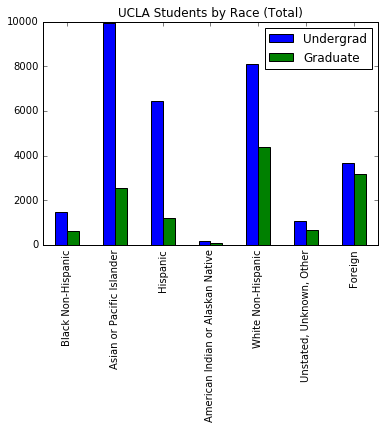

In [92]:
df_clean.plot(kind="bar", title="UCLA Students by Race (Total)");

## Conclusion

That's it! It might not look like it but we accomplished a lot. We scraped some data from a website, extracted the parts that we were interested in, and then parsed and cleaned it. We then proceeded to using this data to create a Pandas DataFrame, and use the latter to analyze the data. You should now have the basic knowledge to star working on HW0. Have fun!

Also, How can I convert to Percentages?

In [84]:
total_u = df_clean.Undergrad.sum()
total_g = df_clean.Graduate.sum()
print total_u
print total_g

30873
12675


In [85]:
df_perc = df_clean.copy()

                                   Undergrad  Graduate
Black Non-Hispanic                      1485       619
Asian or Pacific Islander               9917      2566
Hispanic                                6462      1188
American Indian or Alaskan Native        169        79
White Non-Hispanic                      8113      4394
Unstated, Unknown, Other                1068       670
Foreign                                 3659      3159
                                   Undergrad  Graduate
Black Non-Hispanic                      1485       619
Asian or Pacific Islander               9917      2566
Hispanic                                6462      1188
American Indian or Alaskan Native        169        79
White Non-Hispanic                      8113      4394
Unstated, Unknown, Other                1068       670
Foreign                                 3659      3159


In [86]:
df_perc.Undergrad = df_perc.Undergrad.apply(lambda f: 100.0*f/total_u)
df_perc.Graduate = df_perc.Graduate.apply(lambda f:100.0*f/total_g)

In [87]:
print df_perc
print df_clean

                                   Undergrad   Graduate
Black Non-Hispanic                  4.810028   4.883629
Asian or Pacific Islander          32.121919  20.244576
Hispanic                           20.930911   9.372781
American Indian or Alaskan Native   0.547404   0.623274
White Non-Hispanic                 26.278625  34.666667
Unstated, Unknown, Other            3.459333   5.285996
Foreign                            11.851780  24.923077
                                   Undergrad  Graduate
Black Non-Hispanic                      1485       619
Asian or Pacific Islander               9917      2566
Hispanic                                6462      1188
American Indian or Alaskan Native        169        79
White Non-Hispanic                      8113      4394
Unstated, Unknown, Other                1068       670
Foreign                                 3659      3159


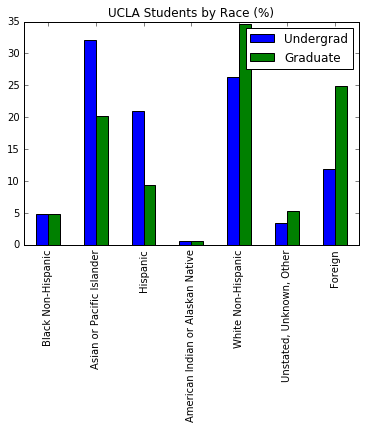

In [93]:
df_perc.plot(kind="bar", title="UCLA Students by Race (%)");

If I want to sort the data?

In [94]:
df_perc.sort_values(['Undergrad'], ascending=[False], inplace=True)

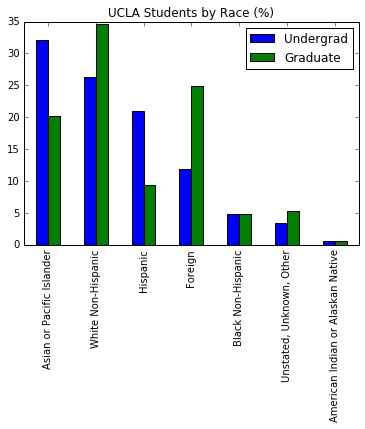

In [96]:
df_perc.plot(kind="bar", title="UCLA Students by Race (%)")

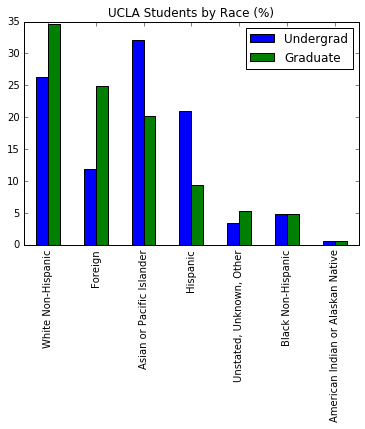

In [97]:
df_perc.sort_values(['Graduate'], ascending=[False], inplace=True)
df_perc.plot(kind="bar", title="UCLA Students by Race (%)")